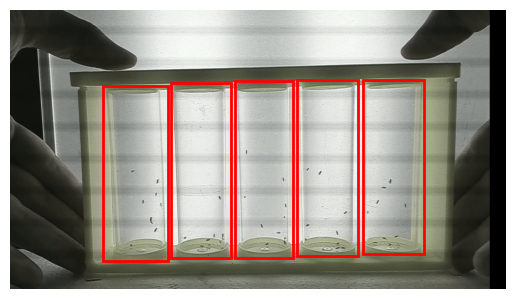

In [3]:
import imageio
import skimage
from skimage import color, io, filters
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import trackpy as tp
import numpy as np
import pandas as pd

# Video file name
video_file = 'Marko Medicinski nonFX/K1mM2/k1mM_S7_2024-06-19 13-02-49.mkv'
csv_file = 'Marko Medicinski nonFX/K1mM2/k1mM_S7_2024-06-19 13-02-49.csv'
#video_file = "mp4 snimci/G2 mp4/G2 S1 2024-03-28 12-40-57.mp4"
#csv_file = "mp4 snimci/G2 mp4/G2 S1 2024-03-28 12-40-57.csv"
#video_file = "Tura Milano/S6 FX 2024-05-16 14-11-14.mkv"
#csv_file = "Tura Milano/S6 FX 2024-05-16 14-11-14.csv"
roi_data = pd.read_csv(csv_file)
first_frame_no = roi_data['First frame'][0]
last_frame_no = roi_data['Last frame'][0]
fly_count = roi_data['Fly Number'][0]

# Read video
video_reader = imageio.get_reader(video_file)
first_frame = video_reader.get_data(first_frame_no)
duration = video_reader.get_meta_data()['fps'] * 30

# Plot the first frame with a red rectangle
fig, ax = plt.subplots()
ax.imshow(first_frame)
ax.axis('off')

for index, row in roi_data.iterrows():
    if index == 5: break
    s = 1 #0.28125
    x_roi = round(row['Top Left X']/s)
    y_roi = round(row['Top Left Y']/s)
    width_roi = round(row['Bottom Right X']/s - x_roi)
    height_roi = round(row['Bottom Right Y']/s - y_roi)
    rect = patches.Rectangle((x_roi, y_roi), width_roi, height_roi, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
plt.show()

410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659


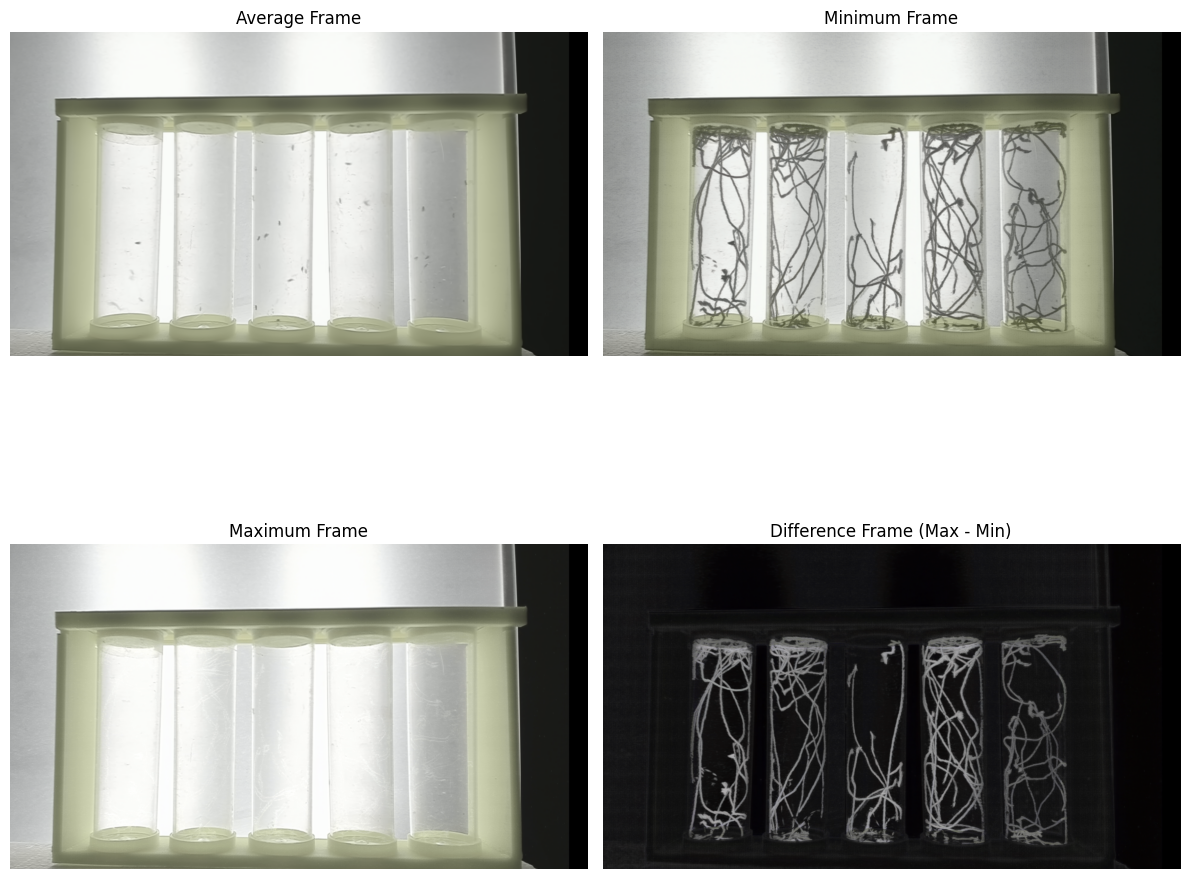

In [283]:
last_frame_no = first_frame_no + int(duration) + 1
frame_shape = first_frame.shape

min_frame = np.full(frame_shape, 255, dtype=np.uint8)  # For minimum frame accumulation
max_frame = np.zeros(frame_shape, dtype=np.uint8)       # For maximum frame accumulation

sum_frame = np.zeros(frame_shape, dtype=np.float32)  # For average calculation

step = 1#20
# Loop through all frames and accumulate them
for frame_no in range(first_frame_no, last_frame_no + 1, step):
    print(frame_no)
    current_frame = video_reader.get_data(frame_no)
    
    # Accumulate sum for average frame
    sum_frame += current_frame.astype(np.float32)  
    
    # Calculate minimum frame by taking the minimum of each pixel
    min_frame = np.minimum(min_frame, current_frame)
    
    # Calculate maximum frame by taking the maximum of each pixel
    max_frame = np.maximum(max_frame, current_frame)

# Calculate the average frame
average_frame = step * sum_frame / duration

# Clip the values and convert back to uint8
average_frame = np.clip(average_frame, 0, 255).astype(np.uint8)

# Calculate the difference between max and min frames
diff_frame = max_frame.astype(np.float32) - min_frame.astype(np.float32)
diff_frame = np.clip(diff_frame, 0, 255).astype(np.uint8)  # Clip to ensure valid uint8 range

# Create a 2x2 plot to show average, min, max, and the difference
plt.figure(figsize=(12, 12))

# Average Frame Plot
plt.subplot(2, 2, 1)
plt.imshow(average_frame)
plt.title('Average Frame')
plt.axis('off')  # Hide axes for better visualization

# Minimum Frame Plot
plt.subplot(2, 2, 2)
plt.imshow(min_frame)
plt.title('Minimum Frame')
plt.axis('off')

# Maximum Frame Plot
plt.subplot(2, 2, 3)
plt.imshow(max_frame)
plt.title('Maximum Frame')
plt.axis('off')

# Difference Frame (Max - Min) Plot
plt.subplot(2, 2, 4)
plt.imshow(diff_frame, cmap='jet')  # Use a colormap to highlight differences
plt.title('Difference Frame (Max - Min)')
plt.axis('off')

plt.tight_layout()
plt.show()


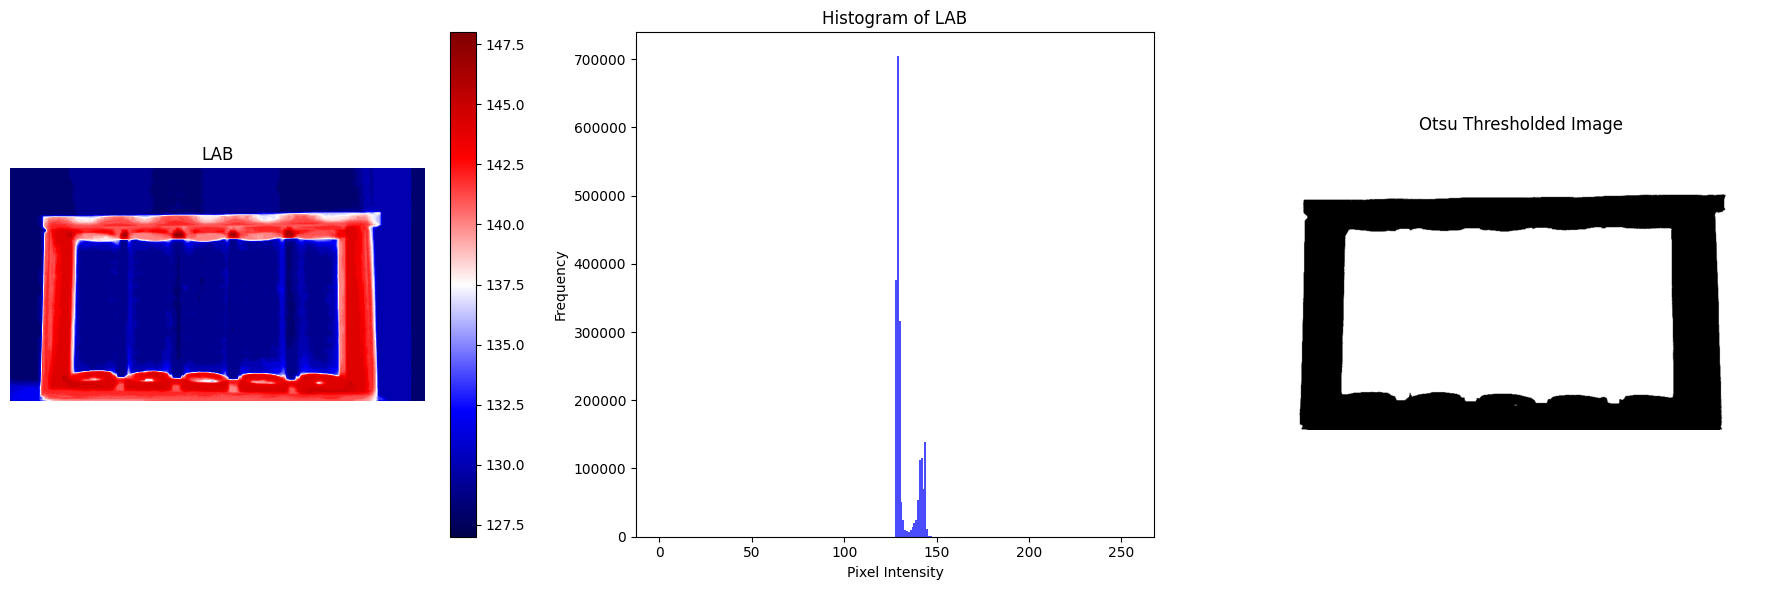

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Convert the average frame to BGR for OpenCV color space conversions
bgr_frame = cv2.cvtColor(average_frame, cv2.COLOR_RGB2BGR)
lab_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2LAB)

lab_frame = lab_frame[:, :, 2]

# Apply Otsu thresholding on the B channel
_, binary_mask = cv2.threshold(lab_frame, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_mask = ~binary_mask
# Create the figure for the image, histogram, and Otsu thresholded image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot the B channel with a colorbar
cax = ax1.imshow(lab_frame, cmap='seismic')
ax1.set_title('LAB')
ax1.axis('off')

# Add colorbar to the image plot
cbar = fig.colorbar(cax, ax=ax1, orientation='vertical')

# Plot the histogram of the B channel
ax2.hist(lab_frame.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
ax2.set_title('Histogram of LAB')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Display the Otsu thresholded image
ax3.imshow(binary_mask, cmap='gray')
ax3.set_title('Otsu Thresholded Image')
ax3.axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()



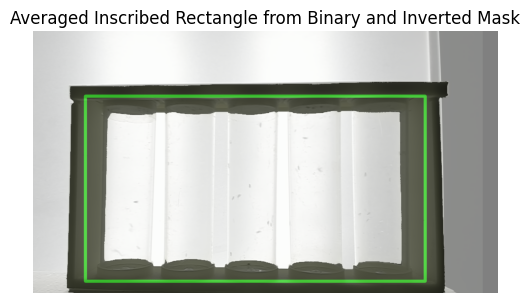

In [285]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

contours_small, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_big, _ = cv2.findContours(~binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour from both masks
largest_contour_binary = max(contours_small, key=cv2.contourArea) if contours_small else None
largest_contour_inverted = max(contours_big, key=cv2.contourArea) if contours_big else None

# Get bounding rectangles for both the largest contours
if largest_contour_binary is not None:
    x1_binary, y1_binary, w_binary, h_binary = cv2.boundingRect(largest_contour_binary)
    x2_binary, y2_binary = x1_binary + w_binary, y1_binary + h_binary  # Right-bottom corner
else:
    x1_binary, y1_binary, x2_binary, y2_binary = 0, 0, binary_mask.shape[1], binary_mask.shape[0]  # Default

if largest_contour_inverted is not None:
    x1_inverted, y1_inverted, w_inverted, h_inverted = cv2.boundingRect(largest_contour_inverted)
    x2_inverted, y2_inverted = x1_inverted + w_inverted, y1_inverted + h_inverted  # Right-bottom corner
else:
    x1_inverted, y1_inverted, x2_inverted, y2_inverted = 0, 0, binary_mask.shape[1], binary_mask.shape[0]  # Default

# Compute the average bounding box by taking the average of corresponding coordinates
x1_avg = int((x1_binary + x1_inverted) / 2)
y1_avg = int((y1_binary + y1_inverted) / 2)
x2_avg = int((x2_binary + x2_inverted) / 2)
y2_avg = int((y2_binary + y2_inverted) / 2)

# Draw the averaged rectangle on the original binary mask
output_image = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2RGB)  # Convert to RGB for visualization
cv2.rectangle(output_image, (x1_avg, y1_avg), (x2_avg, y2_avg), (0, 255, 0), 12)

# Plotting the overlay of the averaged rectangle and the original frame
plt.figure(figsize=(6, 6))
plt.imshow(output_image)
# Overlay the average frame with a colormap (jet) and transparency (alpha)
plt.imshow(average_frame, cmap='jet', alpha=0.5) 
plt.title('Averaged Inscribed Rectangle from Binary and Inverted Mask')
plt.axis('off')  # Hide axes for better visualization
plt.show()


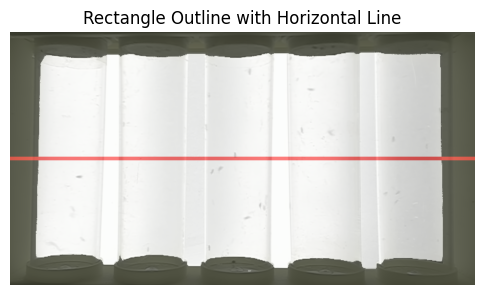

In [286]:
x = int((x1_binary + x1_inverted) / 2)  # Left
y = int((y1_binary + y1_inverted) / 2)  # Top
w = int((x2_binary + x2_inverted) / 2) - x
h = int((y2_binary + y2_inverted) / 2) - y
bin_img = binary_mask[y:y+h,x:x+w]   
org_img = average_frame[y:y+h,x:x+w] 
half_height = h // 2

img_with_line = bin_img.copy()
img_with_line = cv2.cvtColor(img_with_line, cv2.COLOR_GRAY2RGB) 
# Draw a horizontal line at half height
cv2.line(img_with_line, (0, half_height), (w - 1, half_height), (255, 0, 0), 10)
plt.figure(figsize=(6, 6))
plt.imshow(img_with_line)
plt.imshow(org_img, cmap='jet', alpha=0.5) 
plt.title('Rectangle Outline with Horizontal Line')
plt.axis('off')  # Hide axes for better visualization
plt.show()

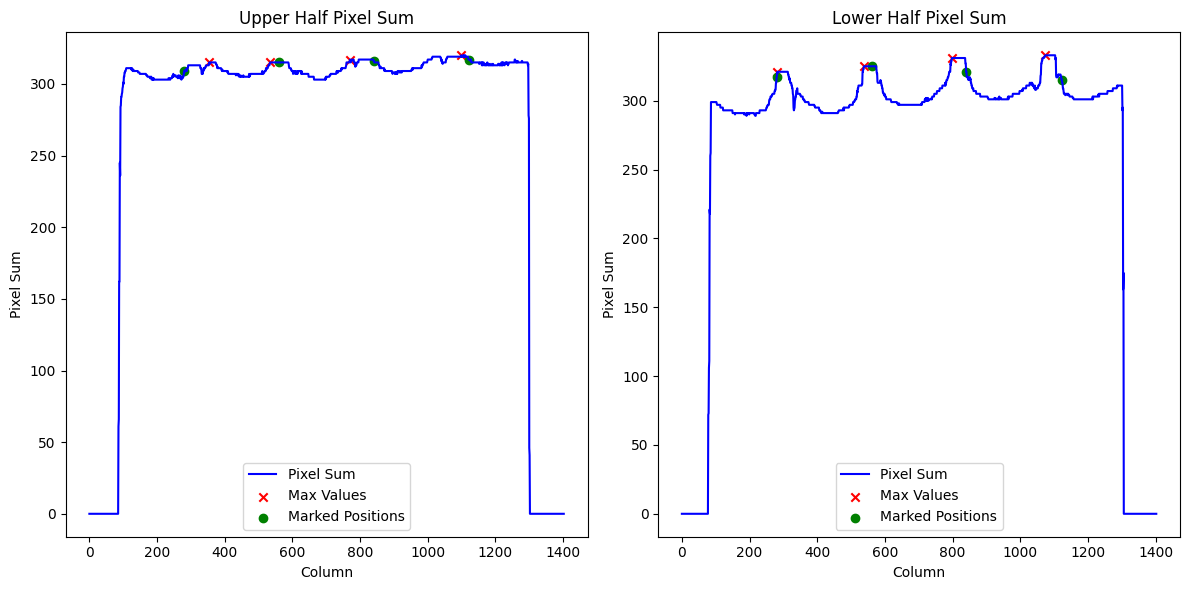

In [287]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate pixel sums for upper and lower halves
upper_half_sum = np.sum(bin_img[:half_height, :], axis=0)/255
lower_half_sum = np.sum(bin_img[half_height:, :], axis=0)/255

# Define the positions for marking
positions = [1/5, 2/5, 3/5, 4/5]
x_indices_upper = (np.array(positions) * w).astype(int)
x_indices_lower = (np.array(positions) * w).astype(int)

# Define window width as 1/5 of the image width
window_width = int(w / 5)

# Initialize lists for maximum value positions
max_upper_positions = []
max_lower_positions = []

# Find the maximum within the specified range for the upper half
for pos in x_indices_upper:
    start = max(0, pos - window_width // 2)
    end = min(w, pos + window_width // 2)
    
    # Get the maximum value's index within the range
    max_index = np.argmax(upper_half_sum[start:end]) + start
    max_upper_positions.append(max_index)

# Find the maximum within the specified range for the lower half
for pos in x_indices_lower:
    start = max(0, pos - window_width // 2)
    end = min(w, pos + window_width // 2)
    
    # Get the maximum value's index within the range
    max_index = np.argmax(lower_half_sum[start:end]) + start
    max_lower_positions.append(max_index)

# Plot the pixel sums
plt.figure(figsize=(12, 6))

# Upper Half Plot
plt.subplot(1, 2, 1)
plt.plot(range(w), upper_half_sum, label='Pixel Sum', color='blue')
plt.scatter(max_upper_positions, upper_half_sum[max_upper_positions], color='red', label='Max Values', marker='x')
plt.scatter(x_indices_upper, upper_half_sum[x_indices_upper], color='green', label='Marked Positions', marker='o')
plt.title('Upper Half Pixel Sum')
plt.xlabel('Column')
plt.ylabel('Pixel Sum')
plt.legend()

# Lower Half Plot
plt.subplot(1, 2, 2)
plt.plot(range(w), lower_half_sum, label='Pixel Sum', color='blue')
plt.scatter(max_lower_positions, lower_half_sum[max_lower_positions], color='red', label='Max Values', marker='x')
plt.scatter(x_indices_lower, lower_half_sum[x_indices_lower], color='green', label='Marked Positions', marker='o')
plt.title('Lower Half Pixel Sum')
plt.xlabel('Column')
plt.ylabel('Pixel Sum')
plt.legend()

plt.tight_layout()
plt.show()


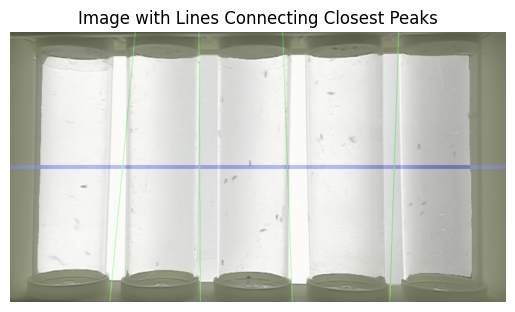

In [288]:
img_with_lines2 = img_with_line.copy()  # Assuming img is your original image
# Draw lines connecting the closest peaks
for upper_peak, lower_peak in zip(max_upper_positions, max_lower_positions):
    # Define coordinates for the lines
    start_point = (upper_peak, 0)  # Start from the upper peak at the top
    end_point = (lower_peak, img_with_lines2.shape[0])  # End at the lower peak at the bottom

    # Draw the line
    cv2.line(img_with_lines2, start_point, end_point, color=(0, 255, 0), thickness=2)  # Green lines

# Convert the image from BGR to RGB for correct color display (if using OpenCV)
img_with_lines2 = cv2.cvtColor(img_with_lines2, cv2.COLOR_BGR2RGB)

# Display the image with lines
plt.imshow(img_with_lines2)
plt.imshow(org_img, cmap='jet', alpha=0.75) 
plt.title('Image with Lines Connecting Closest Peaks')
plt.axis('off')  # Hide axis
plt.show()

0 354 354
282 538 256
534 798 264
771 1099 328
1074 1403 329


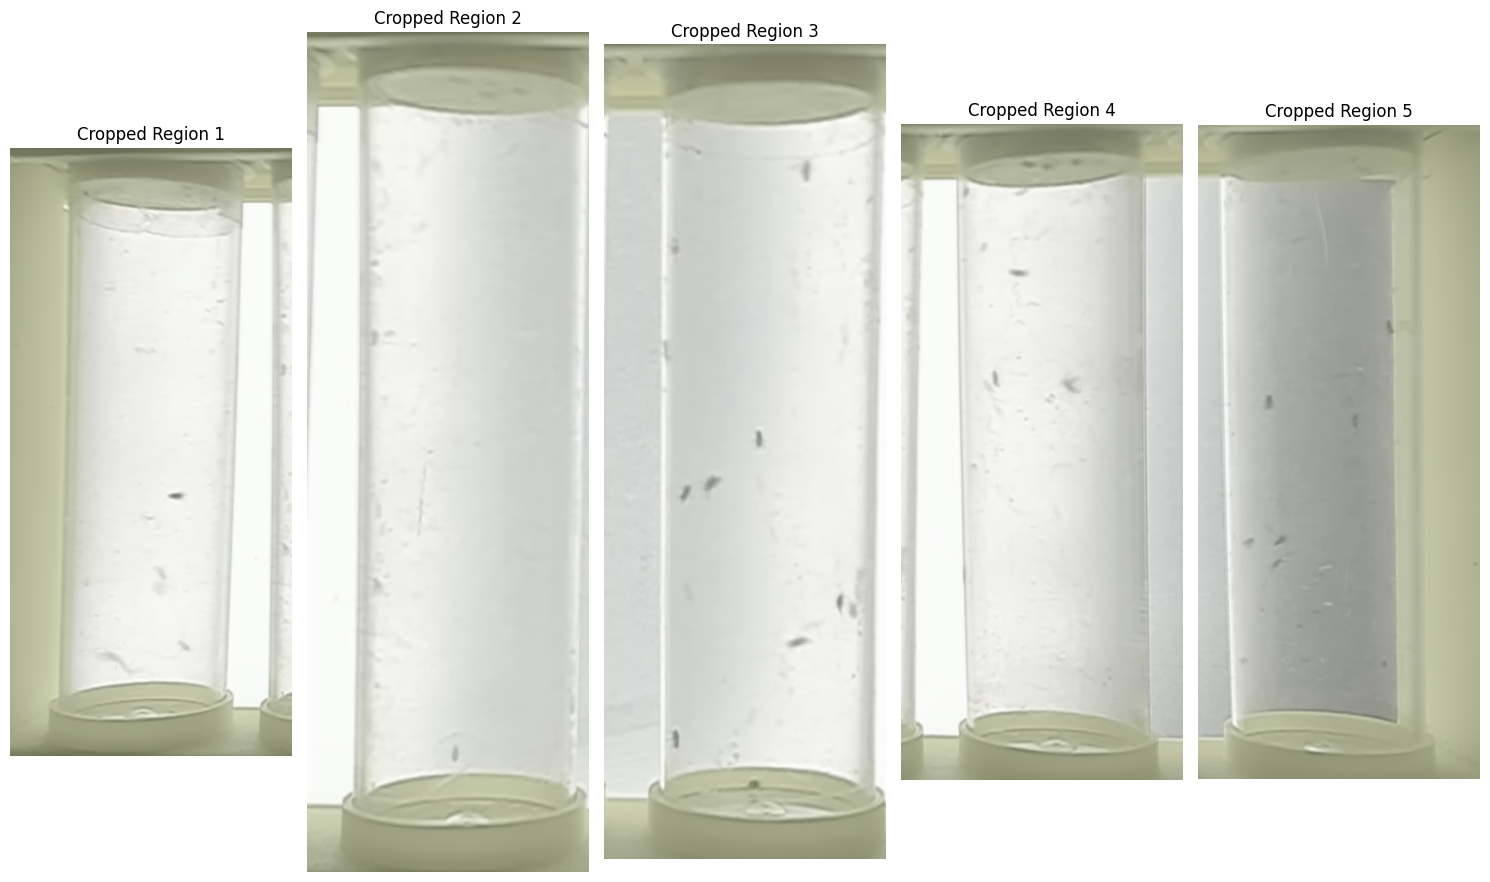

In [289]:
left_indices = np.insert(np.minimum(max_upper_positions, max_lower_positions),0,0)
right_indices = np.maximum(max_upper_positions, max_lower_positions).tolist()
right_indices.append(w)
cropped_regions = []

# Process each region
for start, end in zip(left_indices, right_indices):
    print(start, end, end-start)
    cropped_regions.append(org_img[:,start:end])

# Plot all cropped regions
plt.figure(figsize=(15, 10))
for i, region in enumerate(cropped_regions):
    plt.subplot(1, 5, i + 1)
    plt.imshow(region, cmap='gray')
    plt.title(f'Cropped Region {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


0 354 354
282 538 256
534 798 264
771 1099 328
1074 1403 329


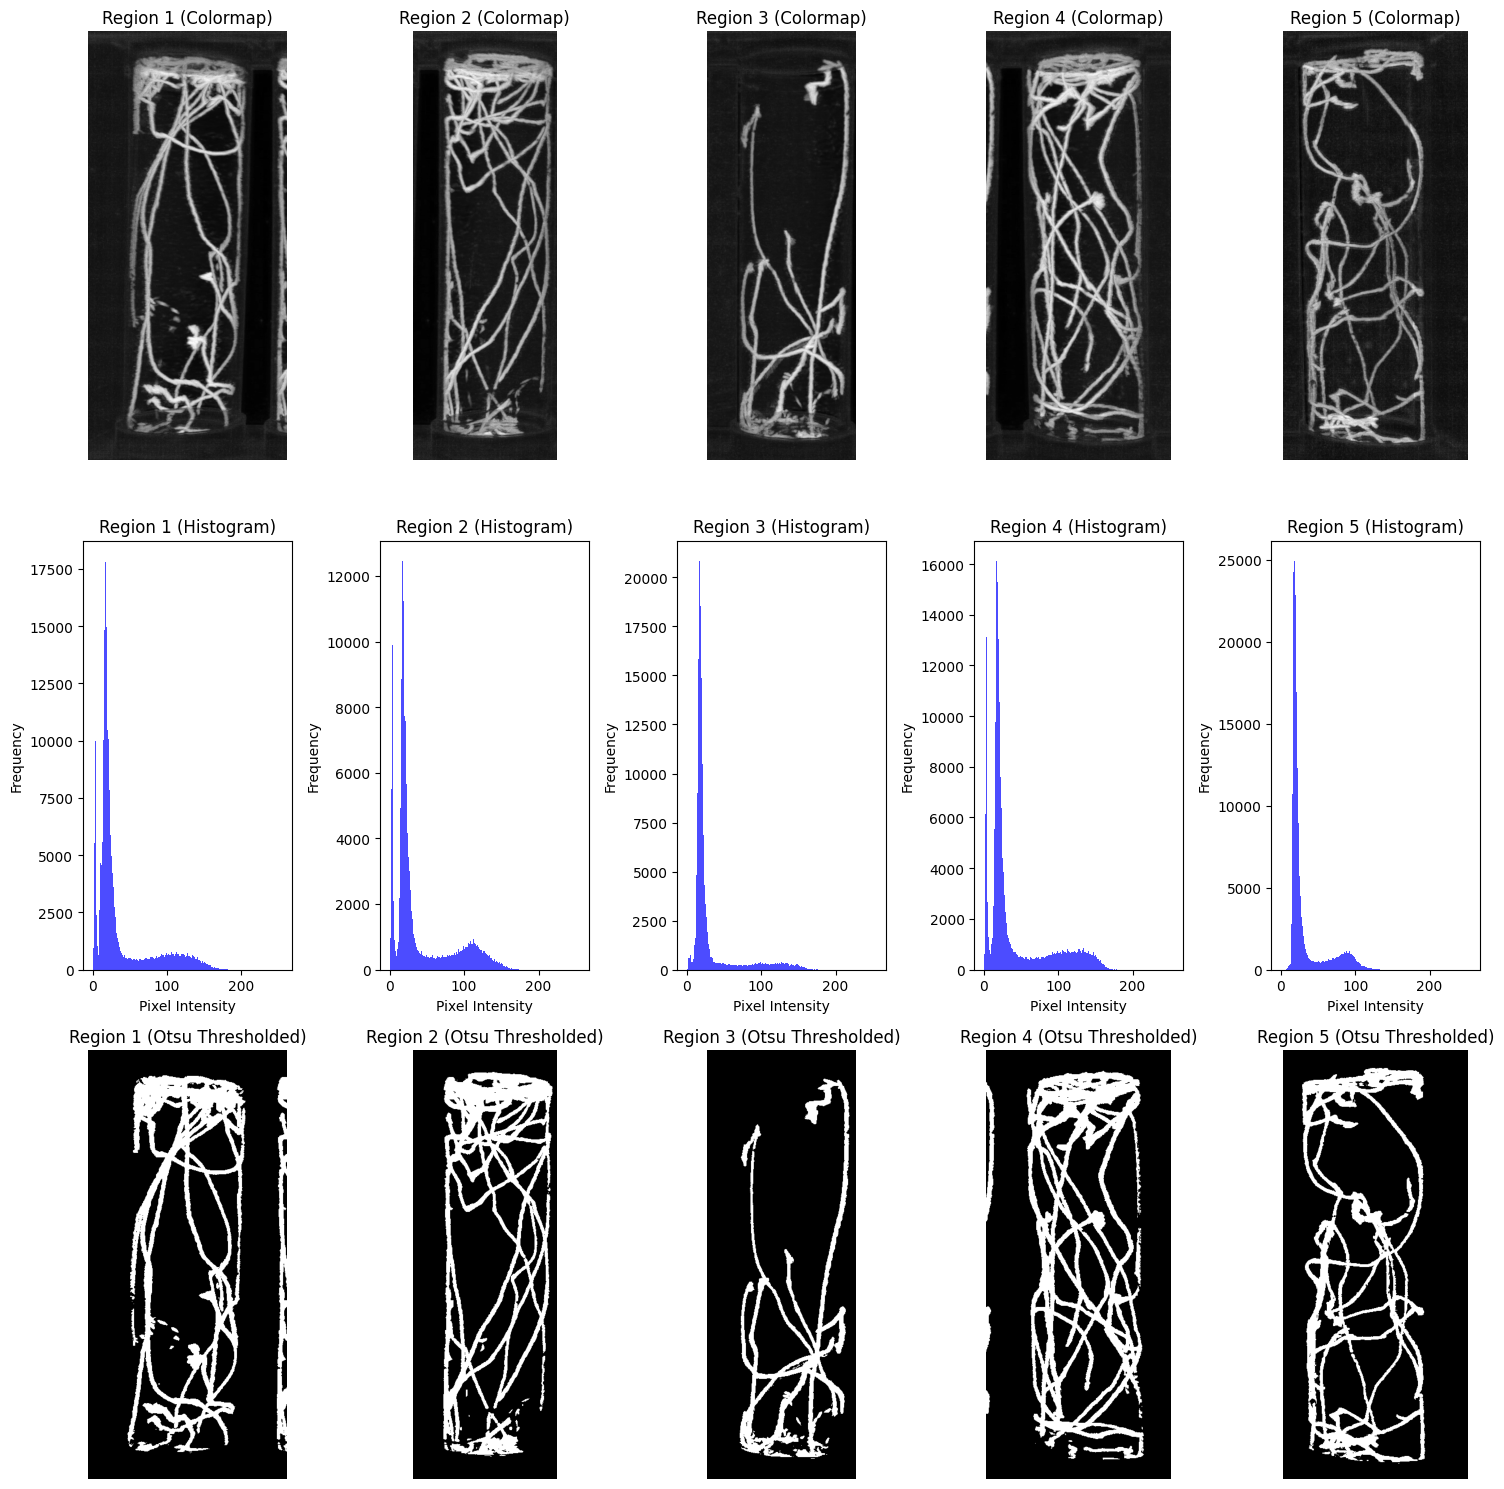

In [297]:
cropped_regions = []
diff_frame_cropped = diff_frame[y:y+h,x:x+w]
# Process each region
for start, end in zip(left_indices, right_indices):
    print(start, end, end-start)
    cropped_regions.append(diff_frame_cropped[:,start:end,1])

from skimage.filters import threshold_otsu
# Create a 3x5 grid (3 rows for each of the 5 regions)
plt.figure(figsize=(15, 15))

for i, region in enumerate(cropped_regions):
    # Row 1: Display the cropped region with jet colormap
    plt.subplot(3, 5, i + 1)
    plt.imshow(region, cmap='gray')
    plt.title(f'Region {i+1} (Colormap)')
    plt.axis('off')

    # Row 2: Display the histogram of pixel intensities
    plt.subplot(3, 5, i + 6)
    plt.hist(region.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
    plt.title(f'Region {i+1} (Histogram)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Row 3: Apply Otsu's thresholding and display the binary image
    otsu_thresh = threshold_otsu(region)
    binary_region = region > otsu_thresh
    plt.subplot(3, 5, i + 11)
    plt.imshow(binary_region, cmap='gray')
    plt.title(f'Region {i+1} (Otsu Thresholded)')
    plt.axis('off')

plt.tight_layout()
plt.show()
